In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [136]:
df = pd.read_csv("48_Industry_Portfolios_daily.CSV")
dates = pd.to_datetime(df.iloc[:, 0], format='%Y%m%d', errors='coerce')
df.iloc[:, 0] = dates

C:\Users\Ubaid\miniconda3\envs\msc\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,11,15,20,26,27,33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [137]:
df=df.rename(columns = {'Unnamed: 0':'Date'})

In [138]:
df.replace(' NaN', np.nan, inplace=True)

In [139]:
df.dropna(inplace=True)
df.drop('Date', axis=1, inplace=True)

In [140]:
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
from sklearn.preprocessing import StandardScaler

In [141]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Agric,Food,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,MedEq,Drugs,Chems,Txtls,BldMt,Cnstr,Steel,Mach,ElcEq,Autos,Aero,Ships,Mines,Coal,Oil,Util,Telcm,BusSv,Comps,Chips,LabEq,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,1.000000,0.429799,0.356041,0.301740,0.390318,0.403620,0.442374,0.405797,0.441259,0.432972,0.421340,0.544851,0.410176,0.500368,0.483337,0.488549,0.523190,0.475785,0.443288,0.446746,0.360377,0.479370,0.367142,0.431790,0.430198,0.414219,0.458014,0.375888,0.416952,0.452034,0.431252,0.490223,0.505905,0.437981,0.425939,0.448498,0.477150,0.418708,0.473889,0.392294
Food,0.429799,1.000000,0.665948,0.550084,0.541419,0.522568,0.609964,0.712914,0.611436,0.630437,0.680825,0.654902,0.525672,0.664938,0.545660,0.523587,0.598395,0.622270,0.576157,0.603480,0.457819,0.476560,0.343114,0.537551,0.625353,0.606721,0.583584,0.463969,0.494654,0.547183,0.585724,0.624161,0.667139,0.672879,0.619695,0.592332,0.671363,0.482177,0.557563,0.531146
Beer,0.356041,0.665948,1.000000,0.451010,0.448754,0.439209,0.481871,0.634681,0.483075,0.531331,0.589933,0.533581,0.398131,0.538895,0.419734,0.398293,0.473175,0.519458,0.464374,0.500339,0.357175,0.360542,0.251070,0.440703,0.511134,0.498685,0.482614,0.392461,0.407236,0.446735,0.471098,0.500944,0.537797,0.572289,0.535904,0.474118,0.539250,0.378743,0.434501,0.441737
Smoke,0.301740,0.550084,0.451010,1.000000,0.392575,0.371482,0.394487,0.507535,0.392371,0.447880,0.488032,0.450361,0.334561,0.434090,0.368930,0.346248,0.402469,0.412287,0.387343,0.410619,0.312065,0.322247,0.237823,0.384505,0.435390,0.413883,0.393167,0.329812,0.342364,0.380098,0.405932,0.421880,0.453831,0.446152,0.438150,0.386092,0.463387,0.309662,0.373210,0.368448
Toys,0.390318,0.541419,0.448754,0.392575,1.000000,0.587806,0.593850,0.593352,0.625856,0.573345,0.560588,0.615553,0.568106,0.641762,0.584698,0.558851,0.637848,0.619514,0.606142,0.591783,0.448772,0.487050,0.364796,0.472821,0.461349,0.546188,0.626957,0.558042,0.589481,0.629674,0.572983,0.659106,0.657714,0.650304,0.613895,0.559006,0.596810,0.535075,0.590890,0.530701
Fun,0.403620,0.522568,0.439209,0.371482,0.587806,1.000000,0.635637,0.563013,0.621082,0.570117,0.549645,0.625977,0.593995,0.653305,0.614319,0.607851,0.663062,0.624301,0.627385,0.594865,0.451640,0.531087,0.406873,0.474550,0.460799,0.591318,0.653830,0.590797,0.604109,0.625874,0.573677,0.654842,0.640880,0.642109,0.632392,0.611103,0.624612,0.575066,0.655871,0.544844
Books,0.442374,0.609964,0.481871,0.394487,0.593850,0.635637,1.000000,0.606009,0.677862,0.612472,0.600939,0.678924,0.642483,0.723030,0.647125,0.639933,0.712290,0.689179,0.663946,0.629229,0.508305,0.551237,0.428265,0.539755,0.560655,0.669954,0.689588,0.564958,0.604731,0.643943,0.625304,0.683201,0.710698,0.683080,0.611513,0.679198,0.701387,0.617152,0.705134,0.576795
Hshld,0.405797,0.712914,0.634681,0.507535,0.593352,0.563013,0.606009,1.000000,0.598216,0.652379,0.696636,0.676409,0.522355,0.685580,0.553886,0.527221,0.617288,0.651203,0.615823,0.632969,0.464900,0.465936,0.331149,0.526658,0.562114,0.599291,0.595432,0.562123,0.550245,0.607061,0.605555,0.653695,0.651429,0.696656,0.675575,0.602182,0.653505,0.477254,0.574638,0.529364
Clths,0.441259,0.611436,0.483075,0.392371,0.625856,0.621082,0.677862,0.598216,1.000000,0.594116,0.573413,0.679949,0.685855,0.721834,0.660391,0.629750,0.705169,0.670396,0.667525,0.638497,0.490762,0.546794,0.394372,0.501915,0.534083,0.617577,0.687820,0.572036,0.612889,0.641417,0.621383,0.703517,0.711183,0.748829,0.649479,0.658006,0.685765,0.619705,0.681917,0.570382
MedEq,0.432972,0.630437,0.531331,0.447880,0.573345,0.570117,0.612472,0.652379,0.594116,1.000000,0.747482,0.636383,0.526000,0.634783,0.573604,0.544187,0.629445,0.626412,0.582799,0.608445,0.473062,0.477373,0.372490,0.510988,0.525038,0.583548,0.652134,0.562406,0.575761,0.642707,0.583895,0.636570,0.698523,0.664308,0.622979,0.589603,0.661913,0.501757,0.607917,0.537176


In [142]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
pd.DataFrame(df_std)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.347761,0.542887,-0.169791,0.326177,0.548666,0.591651,0.652767,-0.066304,0.592169,0.263575,...,0.189334,0.615516,0.327324,0.326221,1.034706,0.105616,0.214080,0.936183,0.011104,2.568687
1,0.595722,1.327554,0.318245,0.838614,0.627100,1.625385,0.172983,0.198276,0.719896,0.342328,...,1.300978,0.575254,1.157191,0.026323,1.042598,0.954466,0.573943,1.134109,0.072407,-0.042882
2,-0.155247,0.695461,0.360076,1.246827,-0.064543,0.997037,0.268940,0.471125,0.646909,0.476210,...,0.752985,0.510835,0.864851,0.060597,1.050490,1.525005,-0.222896,0.903195,0.882964,1.791518
3,0.864937,-0.764892,-0.462612,0.317492,-0.235671,-0.746123,-1.140425,0.214813,-0.511765,-0.382206,...,-0.405630,-1.011066,-0.436531,-0.479219,-0.559429,-0.548417,-1.345326,-1.551086,-0.622356,-1.597220
4,-0.537816,-0.666809,-0.692687,-0.229687,-1.020009,-1.401496,-1.452284,-0.578928,-1.296379,-1.429631,...,-1.125850,-1.123800,-1.322980,-1.147564,-1.995729,-0.645826,-1.233939,-1.267393,-1.085532,-1.254146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,-0.169416,-0.230883,-0.469584,-0.559731,-0.806099,0.463279,-0.588673,-0.314348,-0.283679,0.846352,...,-0.476087,-1.429791,-0.464822,-0.042225,-0.575213,-0.172696,-0.060101,-0.831955,-0.588299,-0.567996
12192,-0.027724,-0.274475,0.276413,0.178526,0.876662,0.226804,0.065032,0.115595,0.327589,1.106240,...,0.189334,0.696040,-0.493113,-0.016519,0.813737,0.495252,0.805284,0.685477,0.440222,0.013130
12193,0.028953,0.074266,-0.260426,-0.359967,-0.834620,-0.833956,0.586797,-0.479710,-0.575629,-0.484586,...,-0.108148,-0.246090,-1.417283,2.348391,0.111370,0.168236,0.231217,-0.040252,-0.118313,-0.399960
12194,-0.282770,-2.105365,-0.309230,-0.429450,-0.934445,0.909203,-0.510708,-0.496246,-0.977059,-0.933482,...,-0.703112,-0.978857,-0.379950,-0.427808,0.119262,-0.437092,-0.539918,-0.462494,-0.588299,-0.420964


In [143]:
pca = PCA(n_components=48)
principalComponents = pca.fit_transform(df_std)
print(principalComponents)

[[-2.76868303 -0.49380573  0.18473079 ...  0.71178547 -0.56601653
  -0.14769441]
 [-4.47624893  0.5607823   0.35425333 ...  0.23608869 -0.67031119
   0.00925563]
 [-4.02213278 -0.51854852 -0.27904406 ... -0.21450073 -0.35092926
   0.15535209]
 ...
 [-0.38469849  0.23696616  1.2023909  ... -0.15941654 -0.8334393
   0.51772113]
 [ 3.50829022 -1.12840373  0.30841421 ... -0.29284823 -0.21673743
   0.66181366]
 [-1.10697315  0.63374873 -0.90496095 ...  0.07855738  0.35106737
   0.26943498]]


Text(0, 0.5, 'Cumulative Explained Variance')

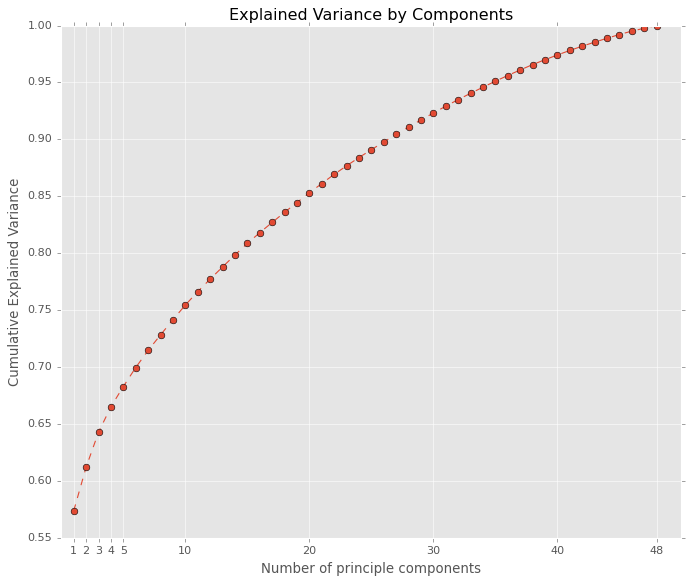

In [144]:
plt.figure(figsize = (10,8))
plt.plot(range(1,49), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle='--')
plt.xticks([1,2,3,4,5,10,20,30,40,48])
plt.title('Explained Variance by Components')
plt.xlabel('Number of principle components')
plt.ylabel('Cumulative Explained Variance')

In [145]:
pca.components_.shape

(48, 48)

# PCA with K-means clustering

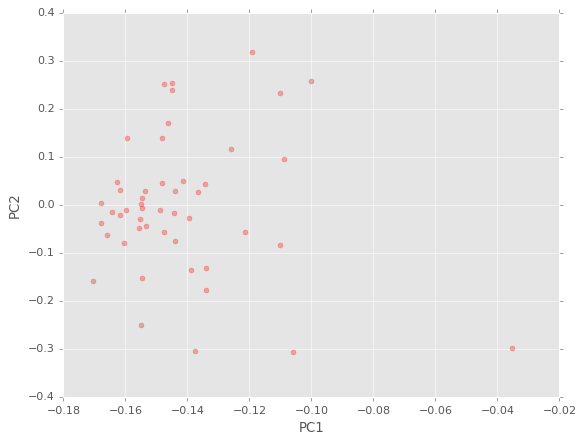

In [146]:
pca = PCA(n_components=48)
principalComponents = pca.fit_transform(df_std)
coefficients = pd.DataFrame(pca.components_)
PCA_components = pd.DataFrame(principalComponents)
plt.scatter(coefficients.iloc[0,:], coefficients.iloc[1,:], alpha=.3, color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [147]:
coefficients

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.110231,-0.144842,-0.110303,-0.119145,-0.100259,-0.141560,-0.144437,-0.155077,-0.147477,-0.154629,...,-0.148826,-0.164492,-0.167769,-0.159551,-0.148049,-0.154571,-0.162785,-0.138922,-0.160478,-0.136565
1,-0.084068,0.252862,0.231578,0.317512,0.257060,0.048492,-0.016969,0.001860,0.251045,0.014177,...,-0.010825,-0.016015,0.003240,0.138615,0.138485,-0.007464,0.047842,-0.136434,-0.080677,0.026093
2,-0.127937,-0.197723,-0.142585,-0.197331,-0.222227,0.087107,0.132284,0.058553,-0.090123,0.091785,...,-0.025151,0.042113,-0.023510,0.084109,0.033306,0.074898,-0.017687,0.021112,0.165897,0.077145
3,-0.014314,-0.001884,-0.086557,-0.070820,-0.109901,-0.013437,0.018723,0.108534,-0.071009,0.150508,...,0.009577,0.070429,0.016717,0.020567,0.015308,0.211703,0.156980,0.286495,0.059855,0.044552
4,0.084681,0.081434,0.157226,0.115179,0.102523,-0.183825,-0.039023,0.052488,-0.010352,-0.044786,...,0.043846,-0.062901,-0.106004,-0.005312,-0.123492,0.191328,0.094304,-0.042551,0.167540,0.036579
5,0.002850,0.038911,0.144353,0.069216,0.046071,0.111276,0.148661,0.041404,-0.009333,0.110764,...,-0.028087,-0.038356,0.037644,0.086696,0.101703,0.049587,0.056873,0.166778,0.046352,0.033505
6,0.540517,-0.037898,-0.184436,-0.062559,0.059003,-0.039748,-0.019729,-0.046201,-0.092242,-0.079373,...,-0.100792,-0.026403,0.103805,-0.091552,0.029692,-0.061043,0.018450,0.043184,-0.017469,-0.006951
7,-0.315475,-0.000454,-0.222625,-0.113509,-0.010478,-0.206883,-0.053311,0.109934,-0.125932,-0.080396,...,-0.140693,-0.105079,0.057434,-0.038874,-0.148519,0.301200,0.278412,0.110646,0.272442,0.160053
8,0.669916,0.031413,-0.233525,0.019287,0.031729,-0.115317,-0.102296,-0.002184,-0.033857,0.015486,...,-0.017126,0.005619,-0.037279,0.020489,-0.072046,0.119383,0.065027,-0.075226,0.101405,0.134625
9,-0.161438,0.003281,-0.444636,-0.209118,0.806806,0.127510,0.080975,-0.024266,-0.022243,0.029908,...,0.043963,0.025160,-0.013144,-0.028420,0.031040,-0.065584,-0.037825,-0.035965,-0.044262,0.082277


C:\Users\Ubaid\miniconda3\envs\msc\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


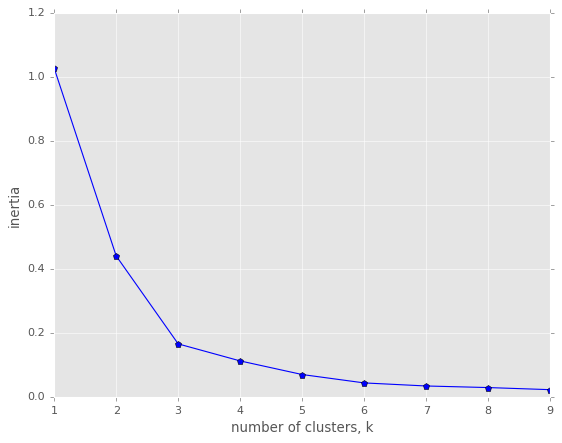

In [148]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(coefficients.iloc[:2, :].transpose())
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='blue')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

In [149]:
PCA_components.iloc[:3, :]

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-2.768683,-0.493806,0.184731,-0.043668,-0.034058,0.767926,0.694101,-0.302428,-0.271160,0.839808,...,0.267994,-0.231698,-0.413569,0.920042,-0.094908,-0.237692,-0.402983,0.711785,-0.566017,-0.147694
1,-4.476249,0.560782,0.354253,-0.215040,-1.000984,0.575930,0.962959,-0.292181,-0.415036,0.216514,...,-0.238231,0.013704,0.398031,-0.866504,0.106572,0.294312,0.488824,0.236089,-0.670311,0.009256
2,-4.022133,-0.518549,-0.279044,-0.224453,0.544947,0.885465,-0.652507,0.207160,-0.244098,-0.252134,...,-0.423251,-0.143227,0.149411,-0.302400,-0.966057,0.577351,-0.380660,-0.214501,-0.350929,0.155352


In [152]:
%matplotlib qt
model = KMeans(n_clusters=3)
model.fit(coefficients.iloc[:2,:].transpose())

labels = model.predict(coefficients.iloc[:2,:].transpose())
plt.scatter(coefficients.iloc[0, :], coefficients.iloc[1, :], c=labels)
for i, txt in enumerate(np.array(df.columns)):
    plt.annotate(txt, (coefficients.iloc[0,:][i], coefficients.iloc[1,:][i]))
plt.show()

In [151]:
np.array(df.columns)

array(['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ',
       'Books', 'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems',
       'Rubbr', 'Txtls', 'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ',
       'ElcEq', 'Autos', 'Aero ', 'Ships', 'Guns ', 'Gold ', 'Mines',
       'Coal ', 'Oil  ', 'Util ', 'Telcm', 'PerSv', 'BusSv', 'Comps',
       'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans', 'Whlsl', 'Rtail',
       'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ', 'Other'], dtype=object)

In [153]:
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}